In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [435]:
train = pd.read_csv("D:/Projects/titanic/train.csv")

In [436]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [437]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

### Missing Data

In [438]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


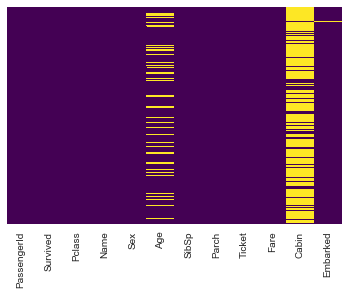

In [439]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap='viridis')


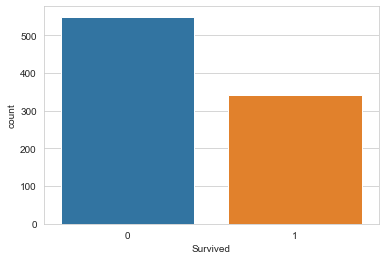

In [440]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

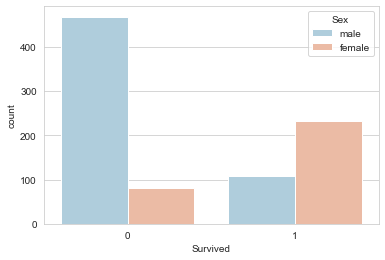

In [441]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

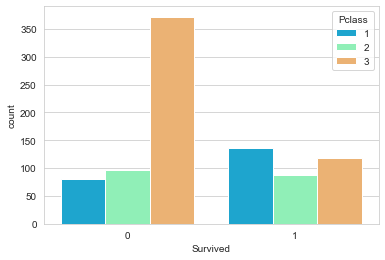

In [442]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

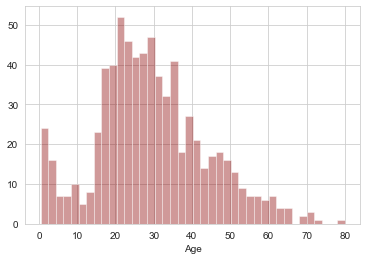

In [443]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

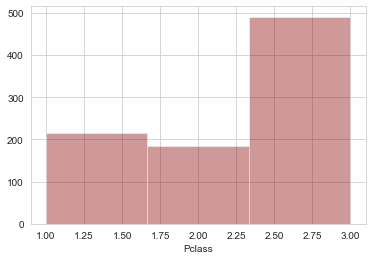

In [444]:
sns.distplot(train['Pclass'].dropna(),kde=False,color='darkred',bins=3)

###### Dist plot renders a histogram, can increase/decrease number of bins for clarity

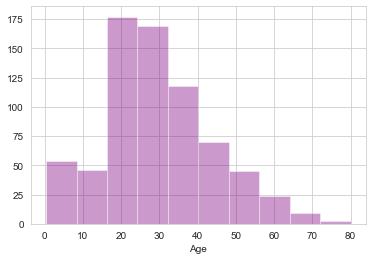

In [445]:
sns.distplot(train['Age'].dropna(),kde=False,color='purple',bins=10)

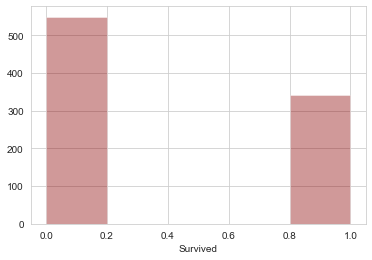

In [446]:
sns.distplot(train['Survived'].dropna(),kde=False,color='darkred',bins=5)

###### matplotlib 'hist' same as sns 'distplot'

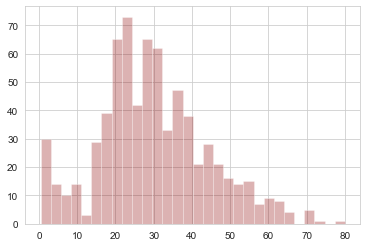

In [447]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)


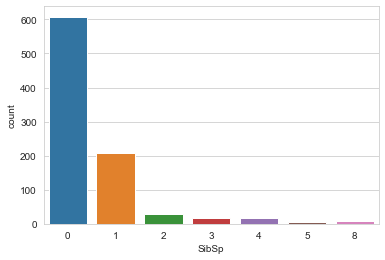

In [448]:
sns.countplot(x='SibSp',data=train)


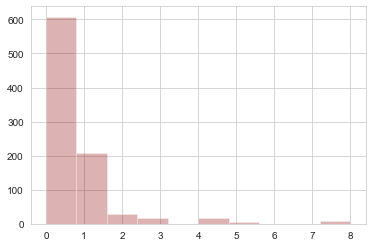

In [449]:
train['SibSp'].hist(bins=10,color='darkred',alpha=0.3)


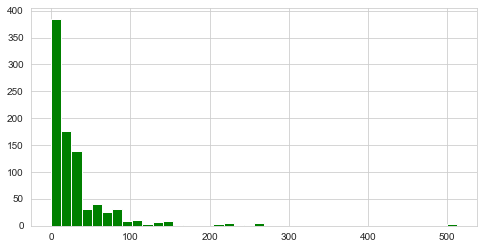

In [450]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


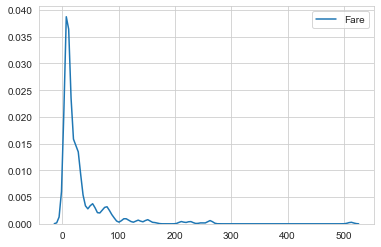

In [451]:
sns.kdeplot(train['Fare'])


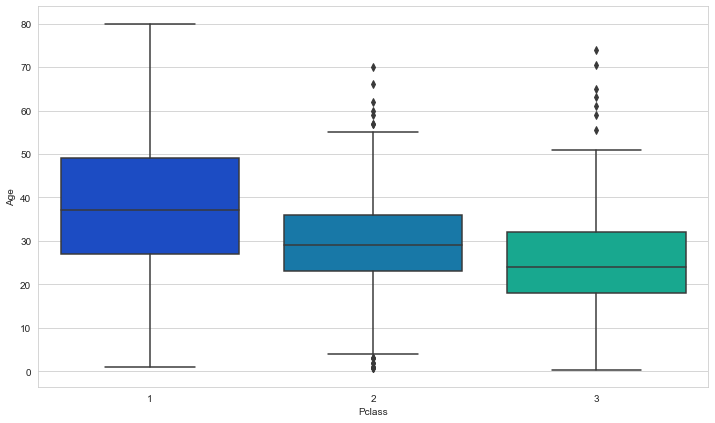

In [452]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

###### Note that countplot, hist, distplot works for single variables i.e to find the frequency of a single variable 
boxplot is for plotting against two variables

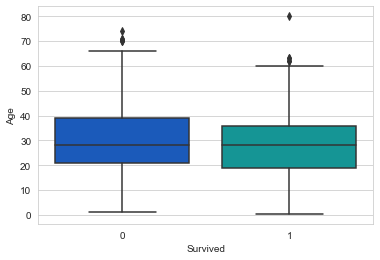

In [453]:
sns.boxplot(x='Survived',y='Age',data=train,palette='winter')

In [454]:
# mean_age = train[['Pclass','Age']].groupby(['Pclass']).mean()
mean_age = train.groupby(['Pclass'])[['Age']].mean()
mean_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [455]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [456]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)


In [457]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

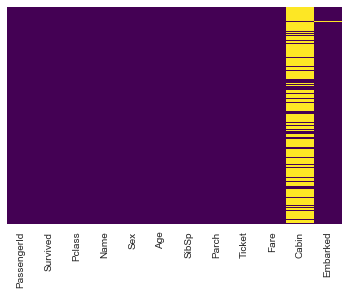

In [458]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [459]:
train.drop('Cabin',axis=1,inplace=True)


In [460]:
train.dropna(inplace = True)

In [461]:
train.drop('Fare',axis=1,inplace=True)

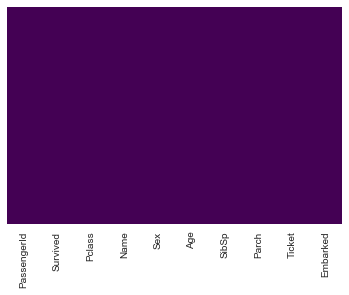

In [462]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

##### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [463]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB


In [464]:
pd.get_dummies(train['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [465]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [466]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [467]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [468]:
train = pd.concat([train,sex,embark],axis=1)
# if axis = 1 is not included, it gets added two times as a row as well

In [469]:
## train.head()

In [470]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
# specify axis = 1 otherwise its an error

In [471]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.0,1,0,1,0,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,0,1
3,4,1,1,35.0,1,0,0,0,1
4,5,0,3,35.0,0,0,1,0,1


## Logistic Regression

In [472]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
#                                                     train['Survived'], test_size=0.30, 
#                                                     random_state=101)
# we have test data so we dont have to split

In [473]:
test = pd.read_csv("D:/Projects/titanic/test.csv")

In [474]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


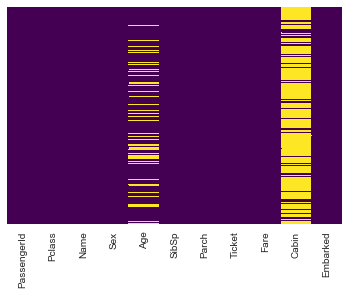

In [475]:
sns.heatmap(test.isnull(),yticklabels = False,cbar = False,cmap='viridis')


In [476]:
mean_age1 = test.groupby(['Pclass'])[['Age']].mean()
mean_age1

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


In [477]:
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [478]:
test['Age'] = test[['Age','Pclass']].apply(impute_age1,axis = 1)


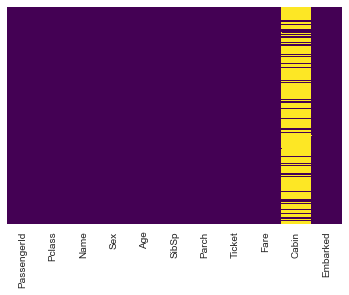

In [479]:
sns.heatmap(test.isnull(),yticklabels = False,cbar = False,cmap='viridis')


In [480]:
test.drop('Cabin',axis=1,inplace=True)


In [481]:
# test.dropna(inplace = True)

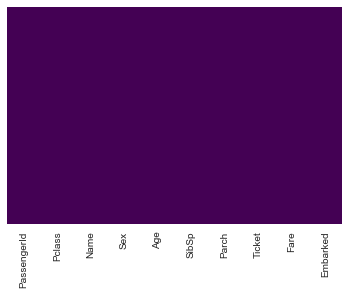

In [482]:
sns.heatmap(test.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [483]:
sex1 = pd.get_dummies(test['Sex'],drop_first=True)
embark1 = pd.get_dummies(test['Embarked'],drop_first=True)

In [484]:
test = pd.concat([test,sex1,embark1],axis=1)


In [485]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.386364,0.447368,0.392344,35.627188,0.636364,0.110048,0.645933
std,120.810458,0.841838,12.949875,0.896760,0.981429,55.907576,0.481622,0.313324,0.478803
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [486]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [487]:
test.drop('Fare',axis=1,inplace=True)

In [488]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S
0,892,3,34.5,0,0,1,1,0
1,893,3,47.0,1,0,0,0,1
2,894,2,62.0,0,0,1,1,0
3,895,3,27.0,0,0,1,0,1
4,896,3,22.0,1,1,0,0,1


In [489]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.0,1,0,1,0,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,0,1
3,4,1,1,35.0,1,0,0,0,1
4,5,0,3,35.0,0,0,1,0,1


In [490]:
x = train.drop(['Survived'], axis = 1)

In [491]:
y = train['Survived'].values

In [492]:
lr = LogisticRegression()
lr.fit(x,y)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [493]:
test.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
male             uint8
Q                uint8
S                uint8
dtype: object

In [494]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
male             uint8
Q                uint8
S                uint8
dtype: object

In [495]:
test.isnull()

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False


In [496]:
yhat = lr.predict(test)

In [497]:
yhat

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [498]:
output_csv = pd.DataFrame()
output_csv['PassengerId'] = test['PassengerId']
output_csv['Survived'] = yhat
output_csv[['PassengerId','Survived']].to_csv('titanic_predictions.csv', index=False)

In [499]:
output_csv.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.373206
std,120.810458,0.484236
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [500]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [502]:
from sklearn.metrics import accuracy_score
